# Hate Speech Detector 2.0
---
**Extended hateful and vulgar phrase dictionaries analysis; Duplicated data analysis**
1. Duplicated data analysis:
    1. Reperforming of the whole data quantitative and qualitive analysis after certain rows duplication.
    2. Single class cardinalities (%) + comparison with unduplicated data results.
    3. Combination of classes cardinalities (UpSet plot).
2. Extended data analysis:
    1. Reperforming of phrases quantitative and qualitive analysis for extended dictionaries.
    2. Hateful phrases cardinalities (with stacked bar of additional phrases)

In [1]:
import numpy as np
import pandas as pd

import os
import csv
import pickle

import matplotlib.pyplot as plt

from src.utils.lemm import load_lemm_phrases
from src.utils.ext import load_ext_phrases
from src.dataframes.utils import classes
from src.dataframes.cards import (class_single_cards, class_combination_cards, class_single_cards_comp,
                                  phrase_cards, phrase_cards_comp)
from src.visualization.cards import (single_cardinalities_bar, single_cardinalities_comp_bar,
                                     combination_cardinalities_upset,
                                     phrase_cardinalities_bar, phrase_cardinalities_comp_bar)
from src.constants import (LABELS, LABELS_SMALL, LABELS_SMALL,
                           COMBINED_PATH, DUPLICATED_PATH,
                           EDA_CHART_DIR)

In [2]:
pd.set_option('display.max_colwidth', 400)

In [3]:
plt.style.use('ggplot')

## Class cardinalities

In [4]:
df_combined = pd.read_csv(COMBINED_PATH)
df_duplicated = pd.read_csv(DUPLICATED_PATH)

### Single classes

**Unduplicated**

In [5]:
df_classes_c = classes(df_combined, convert_null=True)
df_classes_c.head(2)

,wyzywanie,grożenie,wykluczanie,odczłowieczanie,poniżanie,stygmatyzacja,szantaż
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0


In [6]:
df_single_cards_c = class_single_cards(df_classes_c)
df_single_cards_c

,cardinality,%
label,,
total,15202,100.000000
stygmatyzacja,830,5.459808
poniżanie,700,4.604657
grożenie,393,2.585186
wyzywanie,242,1.591896
odczłowieczanie,174,1.144586
wykluczanie,94,0.618340
szantaż,6,0.039468


**Duplicated**

In [7]:
df_classes_d = classes(df_duplicated)
df_classes_d

,wyzywanie,grożenie,wykluczanie,odczłowieczanie,poniżanie,stygmatyzacja,szantaż
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
15786,0,0,0,0,0,0,0
15787,0,0,0,0,0,0,0
15788,0,0,0,0,0,0,0
15789,0,0,0,0,0,0,0


In [8]:
df_single_cards_d = class_single_cards(df_classes_d)
df_single_cards_d

,cardinality,%
label,,
total,15791,100.000000
stygmatyzacja,1096,6.940662
poniżanie,1040,6.586030
grożenie,717,4.540561
wyzywanie,532,3.369008
wykluczanie,452,2.862390
odczłowieczanie,419,2.653410
szantaż,60,0.379963


**Comparison**

In [9]:
df_single_class_comp = class_single_cards_comp(df_single_cards_c, df_single_cards_d)
df_single_class_comp

,card. before,% before,card. after,% after
hate type,,,,
total,15202,100.000000,15791,100.000000
stygmatyzacja,830,5.459808,1096,6.940662
poniżanie,700,4.604657,1040,6.586030
grożenie,393,2.585186,717,4.540561
wyzywanie,242,1.591896,532,3.369008
odczłowieczanie,174,1.144586,452,2.862390
wykluczanie,94,0.618340,419,2.653410
szantaż,6,0.039468,60,0.379963


**Visualizations**

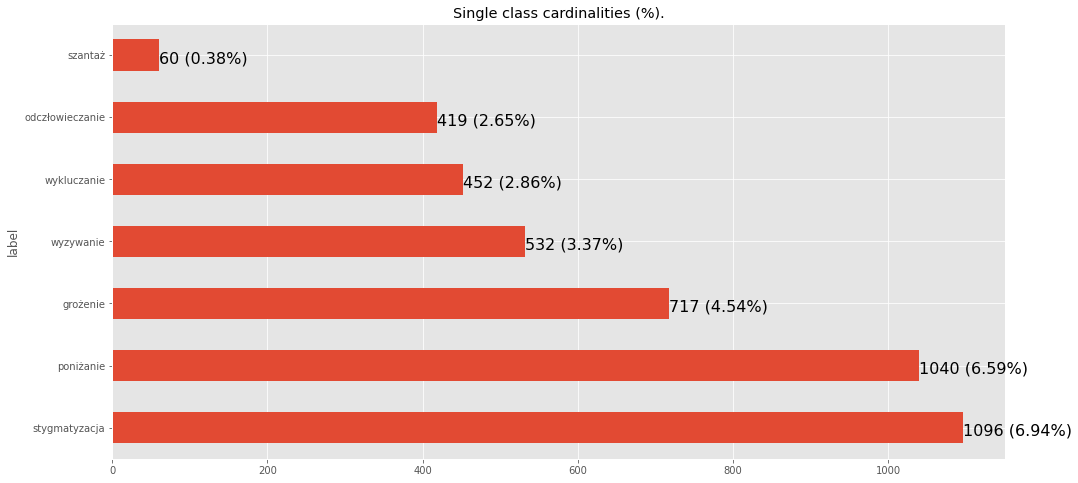

In [10]:
single_cardinalities_bar(df_single_cards_d,
                         save_file=EDA_CHART_DIR.replace('{}', 'single_class_cardinalities_bar'))

The 'stygmatyzacja' (6.94%) and 'poniżanie' (6.59%) labels are at the top. The 'odczłowieczanie' (2.65%) and 'szantaż' (0.38%) are at the bottom.

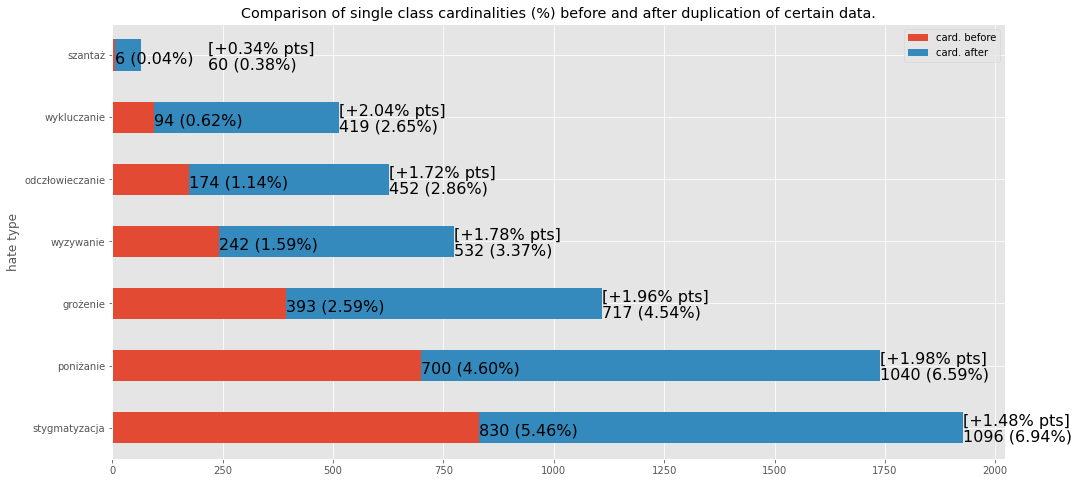

In [11]:
single_cardinalities_comp_bar(df_single_class_comp,
                              save_file=EDA_CHART_DIR.replace('{}', 'single_class_cardinalities_comp_bar'))

The 'wykluczanie' recorded the highest increase [+2.04% pts] and the 'szantaż' - the lowest [+0.34% pts].

### Combinations of classes

In [12]:
df_single_cards_d

,cardinality,%
label,,
total,15791,100.000000
stygmatyzacja,1096,6.940662
poniżanie,1040,6.586030
grożenie,717,4.540561
wyzywanie,532,3.369008
wykluczanie,452,2.862390
odczłowieczanie,419,2.653410
szantaż,60,0.379963


In [13]:
df_combination_cards = class_combination_cards(df_classes_d)
df_combination_cards

cardinality  \
wyzywanie grożenie wykluczanie odczłowieczanie poniżanie stygmatyzacja szantaż                
0         0        0           0               0         0             0              13654   
                                                         1             0                361   
                                               1         0             0                251   
                                                         1             0                197   
          1        0           0               0         0             0                179   
                                                         1             0                106   
1         0        0           0               1         0             0                 57   
                                               0         0             0                 43   
                               1               1         1             0                 40   
0         0        0           1               0         0             0                 36   
1         0        0           0               1         1             0                 32   
0         1        1           0               0         0             0                 32   
          0        0           1               1         0             0                 23   
1         0        1           0               1         1             0                 20   
                   0           1               0         1             0                 20   
                                               1         0             0                 20   
                   1           0               0         0             0                 20   
                                               1         0             0                 20   
                   0           1               0         0             0                 20   
                   1           1               1         1             0                 20   
                                                         0             0                 20   
          1        0           0               0         0             0                 20   
                                                         1             0                 20   
                                               1         0             0                 20   
                                                         1             0                 20   
                   1           0               0         0             0                 20   
                                               1         0             0                 20   
                                                                       1                 20   
                                                         1             0                 20   
          0        0           0               0         1             0                 20   
0         1        1           0               0         1             0                 20   
                               1               0         0             0                 20   
          0        1           1               1         1             0                 20   
                   0           1               0         1             0                 20   
                                               1         1             0                 20   
                   1           0               0         0             0                 20   
                                                         1             0                 20   
                                               1         0             0                 20   
                                                         1             0                 20   
                               1               0         0             0                 20   
                                               1         0             0                 2

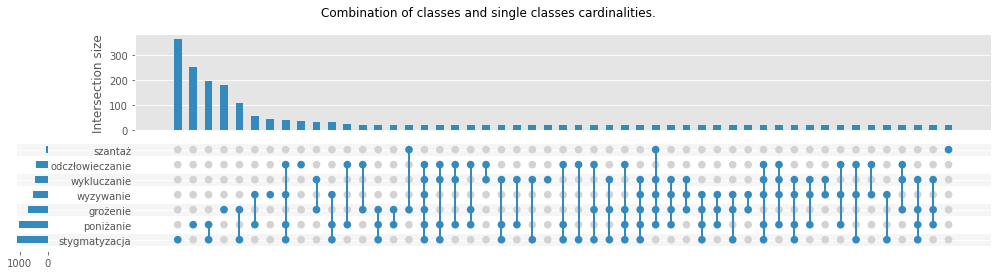

In [14]:
combination_cardinalities_upset(df_combination_cards, color='#348abd',
                                save_file=EDA_CHART_DIR.replace('{}', 'combination_of_class_cardinalities_upset'))

Now all existing class combinations cardinalities are not less than 20.

## Lemmatized and extended phrase dictionaries

**Lemmatized phrases**

In [15]:
lemm_phrases = load_lemm_phrases()

/home/jakub/Dokumenty/Semestr 9.2/HSD2/src/utils/lemm.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(aphr)


**Extended phrases**

In [16]:
ext_phrases = load_ext_phrases()

/home/jakub/Dokumenty/Semestr 9.2/HSD2/src/utils/ext.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(aphr)


**Visualizations**

In [17]:
df_phrase_cards = phrase_cards(ext_phrases)
df_phrase_cards

,cardinality
hate type,
wyzywanie,383
grożenie,722
wykluczanie,201
odczłowieczanie,255
poniżanie,1158
stygmatyzacja,1100
szantaż,21


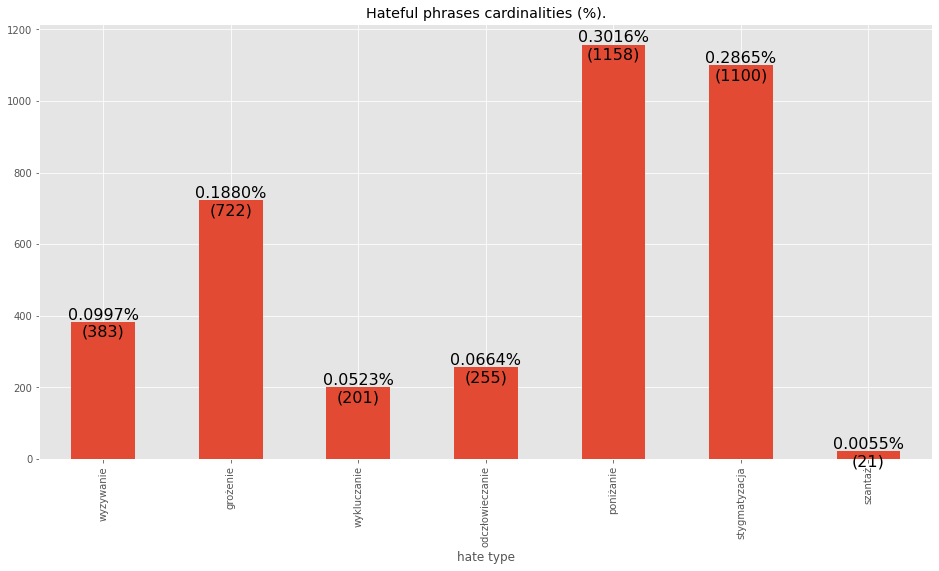

In [18]:
phrase_cardinalities_bar(df_phrase_cards,
                         save_file=EDA_CHART_DIR.replace('{}', 'hateful_phrases_cardinalities_bar'))

In [19]:
df_phrase_cards_comp = phrase_cards_comp(lemm_phrases, ext_phrases)

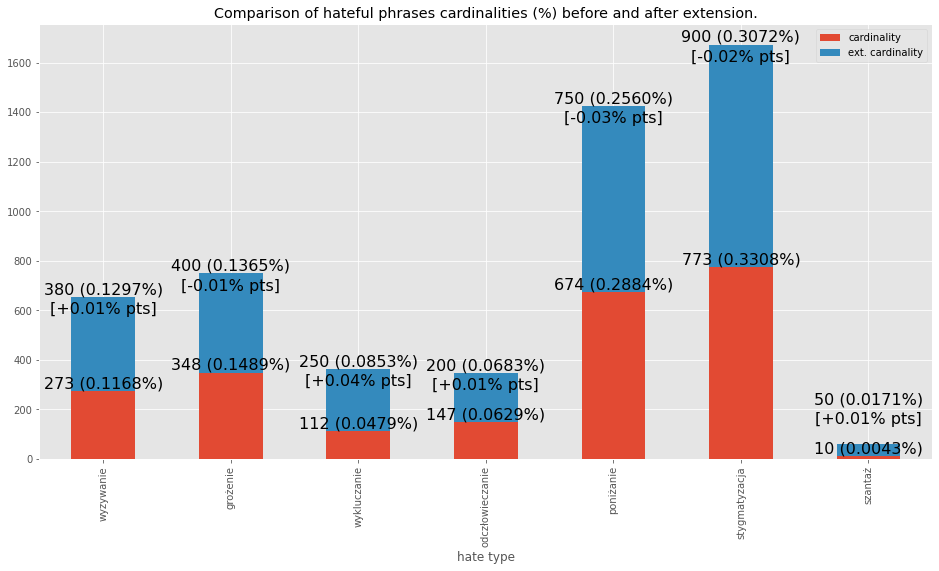

In [20]:
phrase_cardinalities_comp_bar(df_phrase_cards_comp,
                              save_file=EDA_CHART_DIR.replace('{}', 'hateful_phrases_cardinalities_comp_bar'))

The 'wykluczanie' recorded the highest increase [+0.04% pts] and the 'poniżanie' noticed the highest decrease [-0.03% pts].